In [152]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Histogram

In [153]:
def histogram(img):
    hist = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i,j]] += 1
    return hist

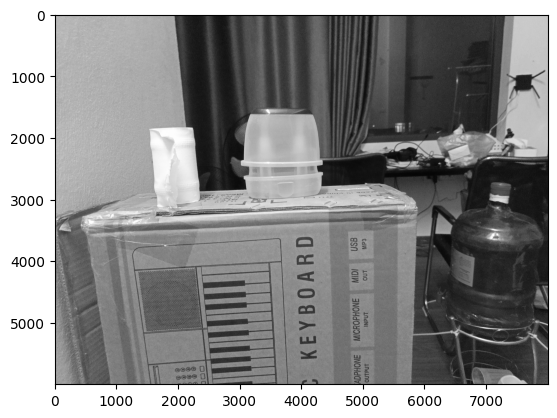

In [154]:
img = cv2.imread('random.jpg', 0)
hist = histogram(img)
plt.imshow(img, cmap='gray')

Text(0, 0.5, 'Frequency')

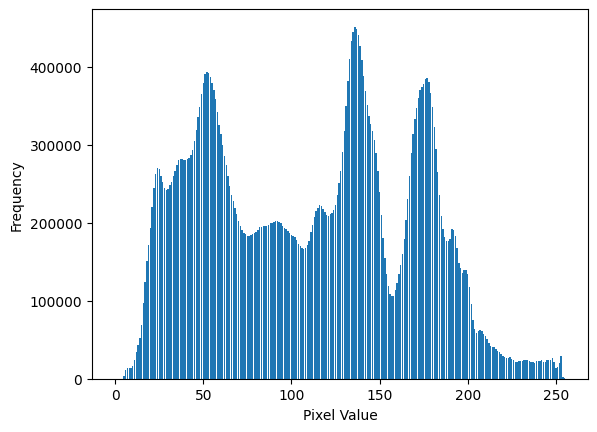

In [155]:
plt.bar(range(len(hist)), hist)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

#### Tách ngưỡng Otsu

$$m(g) = (\Sigma^g_iih(i))/t(g)$$
- Gọi t(g) số điểm ảnh có giá trị <= g
- G là số cấp xám đc xét
- P là số điểm ảnh được xét
- m(g) giá trị trung bình các điểm ảnh <= g

- i.h(i) là momen quán tính của điểm i
- m(g) là momen quán tính trung bình của các điểm có mức xám <=g
- A(g) = t(g)/(P - t(g)) với P là số điểm ảnh đang xét
- B(g) = [m(g) - m(G-1)]^2 (m[G-1], G-1 ở đây là cấp xám lớn nhất)
- F(g) = A(g)*B(g) - 1
- Tìm $\theta$ sao cho F($\theta$) = max{F(g), với g <= G-1} 

In [156]:
a = np.array([1, 2, 3, 4, 5])
cumsum_a = np.cumsum(a)
cumsum_a

array([ 1,  3,  6, 10, 15])

In [157]:
def table(img):
    G = np.arange(0, 256)
    h = histogram(img)
    p = h / np.sum(h)
    P = P = np.cumsum(p)
    m = np.cumsum(p * np.arange(256))
    mG = m[-1]
    variance = ((mG * P - m)**2) / (P * (1 - P))

    df = pd.DataFrame({'G': G, 'h': h, 'p': p, 'P': P, 'm': m, 'variance': variance})
    return df

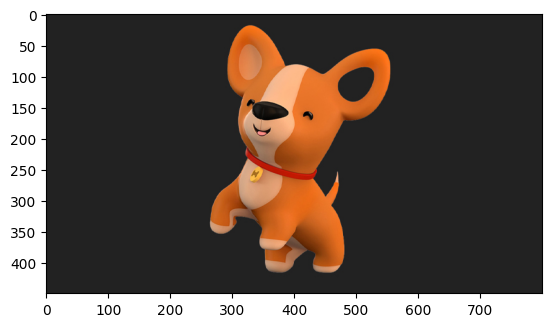

In [158]:
img = cv2.imread('img10.jpg')
table = table(img)
plt.imshow(img[:,:,::-1])

In [159]:
table

,G,h,p,P,m,variance
0,0,183.0,0.000374,0.000374,0.000000,1.647466e+00
1,1,195.0,0.000398,0.000772,0.000398,3.351601e+00
2,2,240.0,0.000490,0.001263,0.001379,5.386743e+00
3,3,247.0,0.000505,0.001767,0.002893,7.418120e+00
4,4,288.0,0.000588,0.002356,0.005247,9.714186e+00
...,...,...,...,...,...,...
251,251,243.0,0.000497,0.993695,64.764134,2.233487e+02
252,252,311.0,0.000635,0.994330,64.924266,2.011864e+02
253,253,612.0,0.001250,0.995580,65.240631,1.571862e+02
254,254,997.0,0.002037,0.997618,65.758055,8.497551e+01


In [160]:
# Chọn ngưỡng
threshold = table.loc[table['variance'].idxmax()]['G']
threshold

106.0

In [168]:
# hàm tách ngưỡng
def thresholding(img, thresshold):
    img[img>thresshold] = 255
    img[img<=thresshold] = 0
    return img

def thresholding1(img, thresshold):
    img[img<=thresshold] = 0.0
    return img

def thresholding2(img, thresshold):
    img[img>thresshold] = 0
    return img

def thresholding3(img, thresshold):
    img[img>thresshold] = 0
    img[img<=thresshold] = 255
    return img

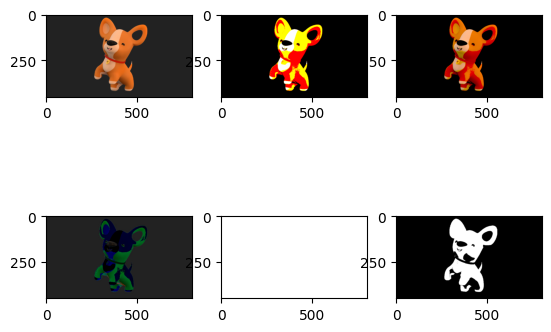

In [169]:
plt.subplot(2, 3, 1)
img = cv2.imread('img10.jpg')
plt.imshow(img[:,:,::-1])

plt.subplot(2, 3, 2)
img = cv2.imread('img10.jpg')
threshold_img = thresholding(img, threshold.astype(int))
plt.imshow(threshold_img[:,:,::-1])

plt.subplot(2, 3, 3)
img = cv2.imread('img10.jpg')
threshold_img1 = thresholding1(img, threshold.astype(int))
plt.imshow(threshold_img1[:,:,::-1])

plt.subplot(2, 3, 4)
img = cv2.imread('img10.jpg')
threshold_img2 = thresholding2(img, threshold.astype(int))
plt.imshow(threshold_img2[:,:,::-1])

plt.subplot(2, 3, 5)
img = cv2.imread('img10.jpg')
threshold_img3 = thresholding3(img, threshold.astype(int))
plt.imshow(threshold_img3[:,:,::-1])

plt.subplot(2, 3, 6)
img = cv2.imread('img10.jpg', 0)
threshold_img_gray = thresholding(img, threshold.astype(int))
plt.imshow(threshold_img_gray, cmap='gray')